In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
PWD = os.getcwd()
DATA_FOLDER = os.path.join(PWD, "powerGeneration")
DATA_FILE = os.path.join(DATA_FOLDER, "database_IND.csv")


In [3]:
power = pd.read_csv(DATA_FILE)
power_types = power["primary_fuel"].unique()
power.sort_values(inplace=True, by=["capacity_mw"], ascending=False)
print(power_types)
power.head()

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
881,IND,India,VINDH_CHAL STPS,IND0000503,4760.0,24.0983,82.6719,Coal,Oil,NaN,...,WRI,NaN,2018.0,26761.39000,27594.0,29047.0,30015.0,35116.0,Central Electricity Authority,NaN
494,IND,India,MUNDRA TPP,IND0000278,4620.0,22.8230,69.5532,Coal,Oil,NaN,...,WRI,NaN,2018.0,27586.20000,28127.0,30539.0,28078.0,20311.0,Central Electricity Authority,NaN
495,IND,India,MUNDRA UMPP,IND0000279,4000.0,22.8158,69.5281,Coal,Oil,NaN,...,WRI,NaN,2018.0,21973.00000,24501.0,23679.0,25303.0,24599.0,Central Electricity Authority,NaN
696,IND,India,SASAN UMPP,IND0000395,3960.0,23.9784,82.6275,Coal,Oil,NaN,...,WRI,NaN,2018.0,2747.91825,15069.0,29342.0,27671.0,29909.0,Central Electricity Authority,NaN
809,IND,India,TIRORA TPP,IND0000457,3300.0,21.4129,79.9671,Coal,Oil,NaN,...,WRI,NaN,2018.0,9615.35000,15501.0,18964.0,16665.0,16604.0,Central Electricity Authority,NaN


In [4]:
power_types = power["primary_fuel"].unique()
print(power_types)

['Coal' 'Nuclear' 'Gas' 'Hydro' 'Solar' 'Oil' 'Wind' 'Biomass']


In [5]:
solar_plants = power.loc[power["primary_fuel"] == "Solar"].copy()
solar_plants.dropna(inplace=True, axis=1)
print(solar_plants.shape)
solar_plants.head()

(127, 9)


,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,owner,source,url
394,IND,India,Kamuthi Solar Power Plant,WRI1026151,648.0,Solar,Adani Power Limited,Adani Power Limite r Er,http://www.adanipower.com
155,IND,India,Charanka Solar Power Plant,WRI1026129,221.0,Solar,Charanka Solar Park,Solar for India,https://natgrp.org/charanka-gujarat-solar-park/
199,IND,India,Dhursar,WRI1020240,125.0,Solar,Reliance Power,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...
200,IND,India,Diwakar,WRI1020241,100.0,Solar,Lanco Infratech,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...
387,IND,India,KVK Energy Solar Project,WRI1020244,100.0,Solar,KVK Energy Ventures Ltd,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...


In [6]:
wind_plants = power.loc[power["primary_fuel"] == "Wind"].copy()
wind_plants.dropna(inplace=True, axis=1)
print(wind_plants.shape)
wind_plants.head()

(123, 8)


,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source,url
835,IND,India,Thimmapuram Wind Farm,WRI1026659,200.0,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1351...
127,IND,India,Bera Wind Farm,WRI1026083,150.0,Wind,CDM,https://cdm.unfccc.int/filestorage/z/g/GHX720L...
558,IND,India,NuPower Tirunelveli Wind Farm,WRI1026065,150.0,Wind,CDM,https://cdm.unfccc.int/filestorage/3/x/NUSA0ZG...
193,IND,India,Davangere Wind Farm,WRI1026100,125.0,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1142...
29,IND,India,Andrha Lake Wind Farm,WRI1026768,113.6,Wind,CDM,https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1...


In [7]:
hydro_plants = power.loc[power["primary_fuel"] == "Hydro"].copy()
hydro_plants.dropna(inplace=True, subset=["generation_gwh_2017", "year_of_capacity_data", "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016"])
hydro_plants.dropna(inplace=True, axis=1)
hydro_plants.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
374,IND,India,KOYNA COMPLEX,IND0000217,1956.0,17.4599,73.6840,Hydro,1984.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,3809.10875,3036.54100,2961.93590,3289.32075,2617.59625,Central Electricity Authority
527,IND,India,NATHPA JHAKRI,IND0000294,1500.0,31.5640,77.9800,Hydro,2003.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,7154.57735,6803.31250,7277.22105,7015.38680,7171.69135,Central Electricity Authority
79,IND,India,BHAKRA,IND0000047,1325.0,31.4107,76.4328,Hydro,1964.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,6179.23855,5241.80925,5863.15690,5142.42865,5108.34990,Central Electricity Authority
677,IND,India,S.SAROVAR RBPH,IND0000383,1200.0,21.8301,73.7501,Hydro,2005.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,5195.68105,2286.26125,1458.55060,2321.20565,374.72695,Central Electricity Authority
708,IND,India,SHARAVATHY,IND0000404,1035.0,14.2352,74.7673,Hydro,1969.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,5565.50265,5229.18270,2651.17750,2695.22615,2708.73825,Central Electricity Authority


In [13]:
hydro_power = hydro_plants[["name", "capacity_mw", "generation_gwh_2017", "year_of_capacity_data", "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016"]]
hydro_power.head()

,name,capacity_mw,generation_gwh_2017,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016
374,KOYNA COMPLEX,1956.0,2617.59625,2018.0,3809.10875,3036.54100,2961.93590,3289.32075
527,NATHPA JHAKRI,1500.0,7171.69135,2018.0,7154.57735,6803.31250,7277.22105,7015.38680
79,BHAKRA,1325.0,5108.34990,2018.0,6179.23855,5241.80925,5863.15690,5142.42865
677,S.SAROVAR RBPH,1200.0,374.72695,2018.0,5195.68105,2286.26125,1458.55060,2321.20565
708,SHARAVATHY,1035.0,2708.73825,2018.0,5565.50265,5229.18270,2651.17750,2695.22615


In [51]:
cols = ["generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016","generation_gwh_2017"]
hydro_power = hydro_power[cols]

This is for row 0
This is for row 1
This is for row 2
This is for row 3
This is for row 4
This is for row 5
This is for row 6
This is for row 7
This is for row 8
This is for row 9
This is for row 10


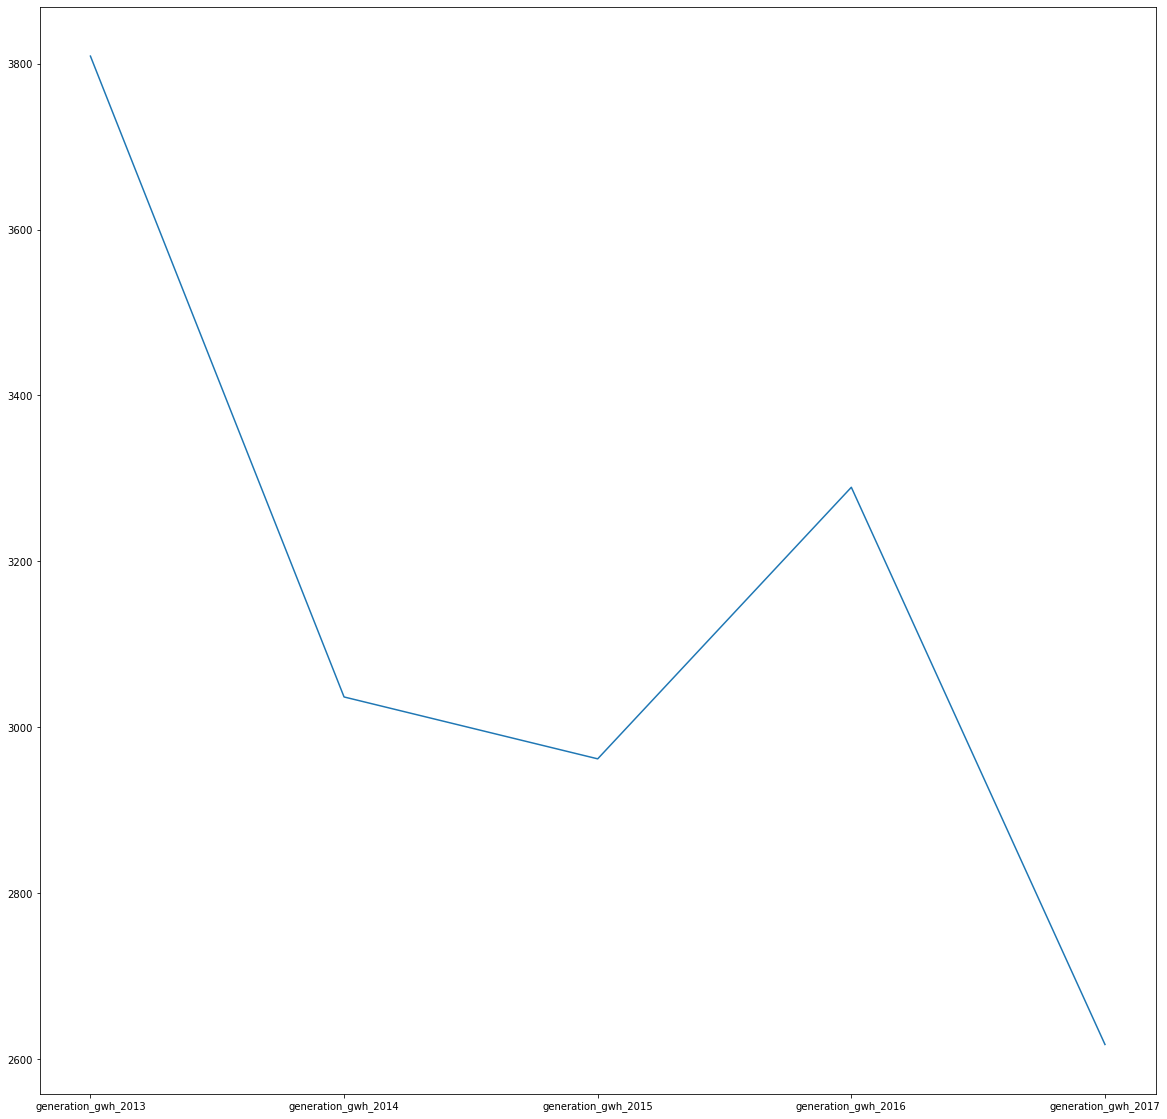

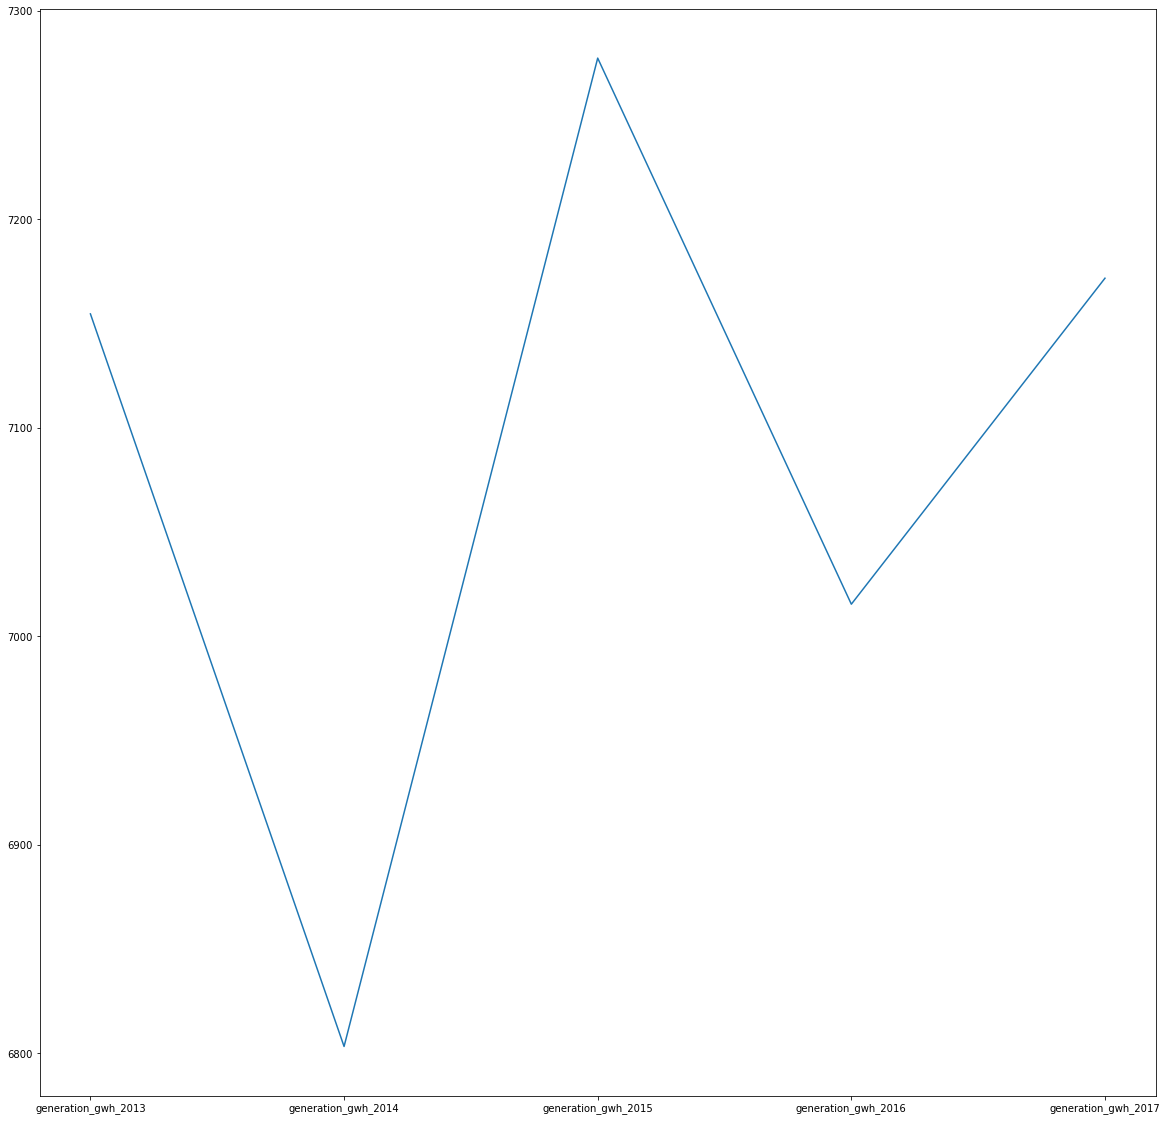

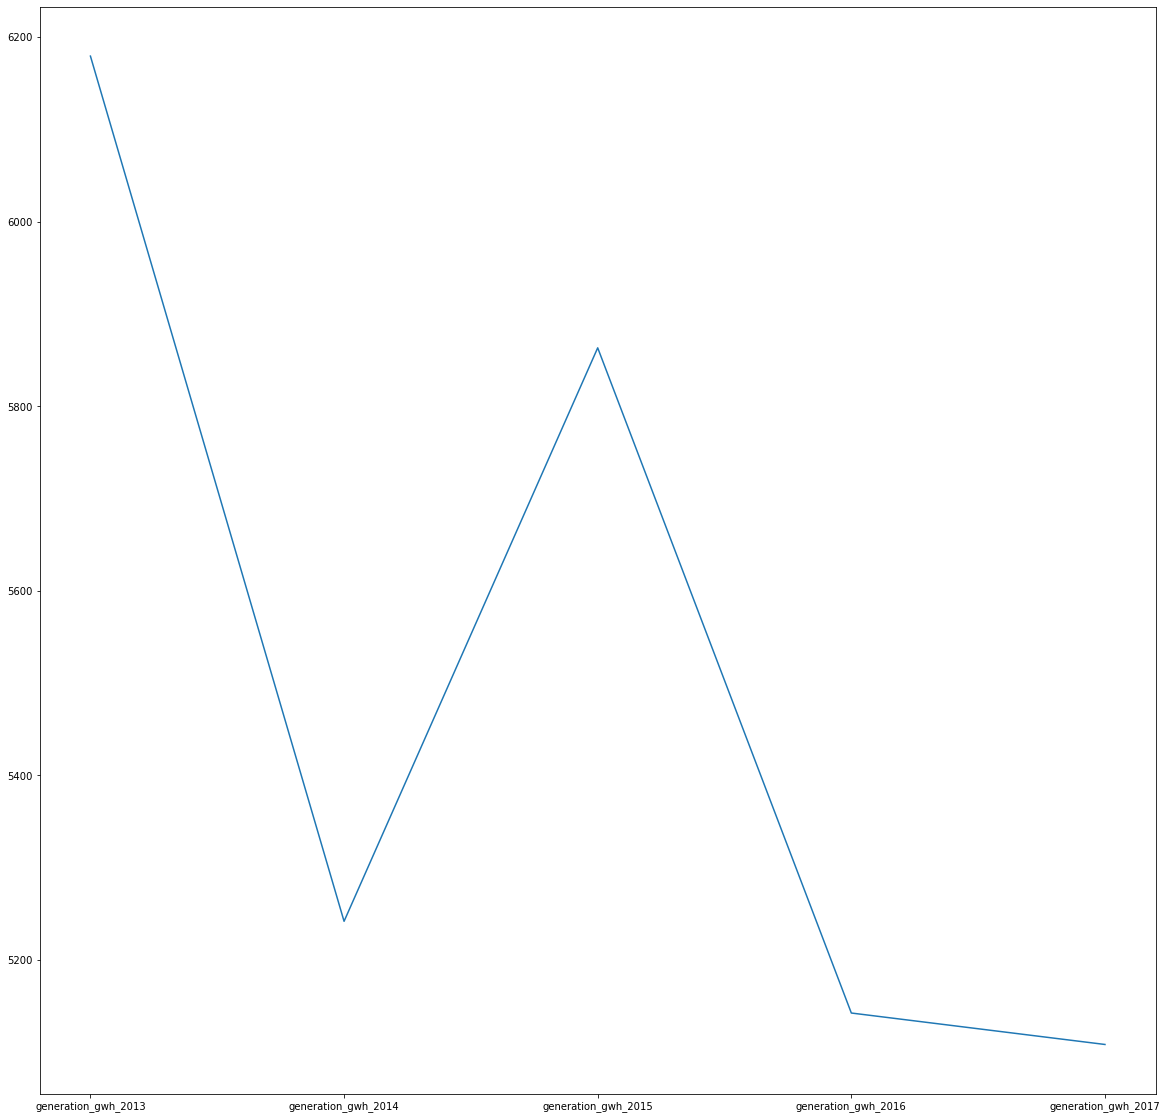

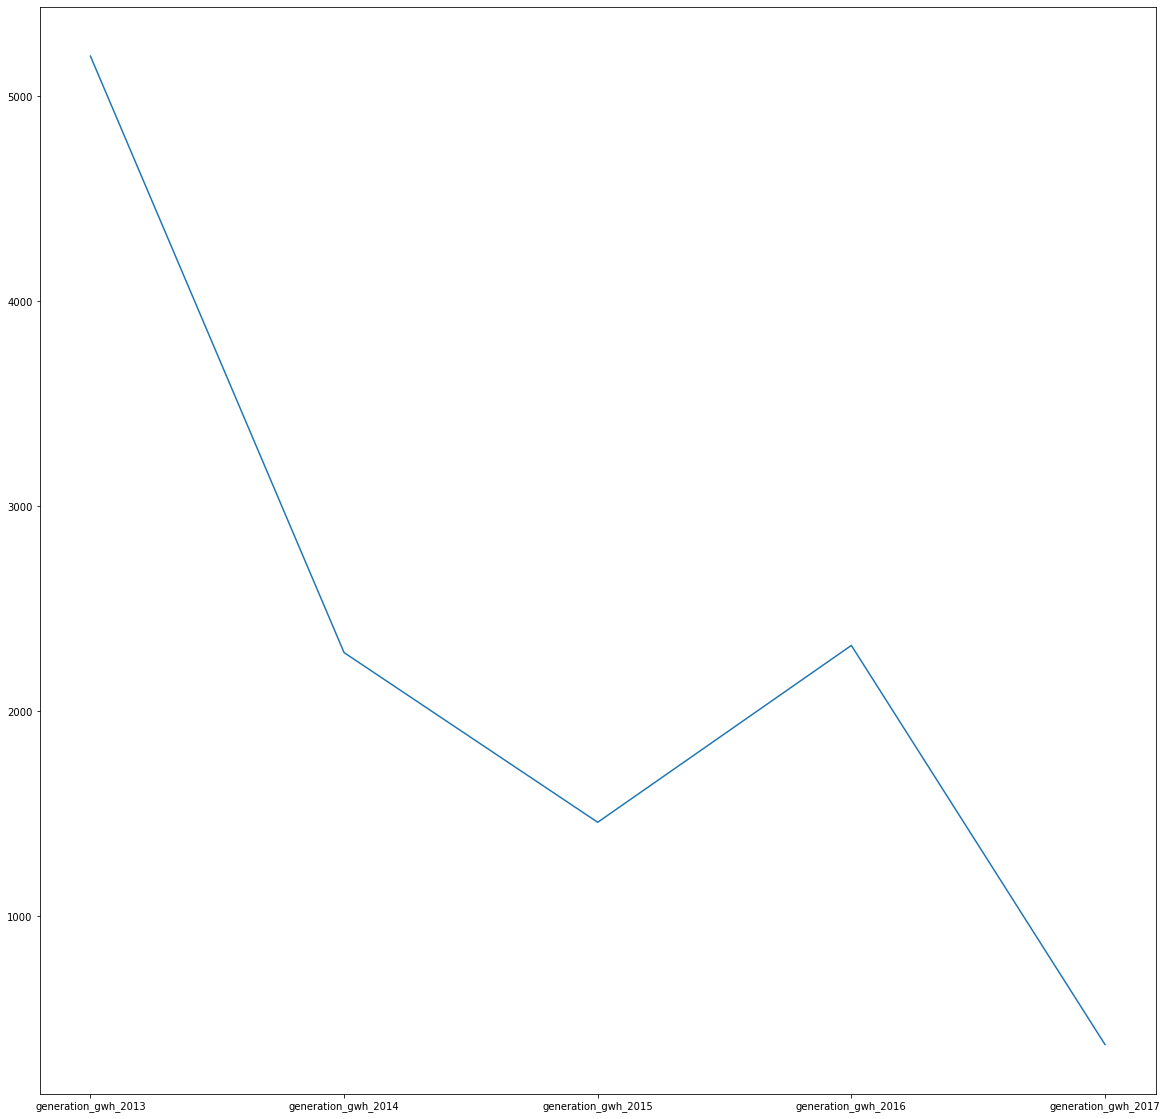

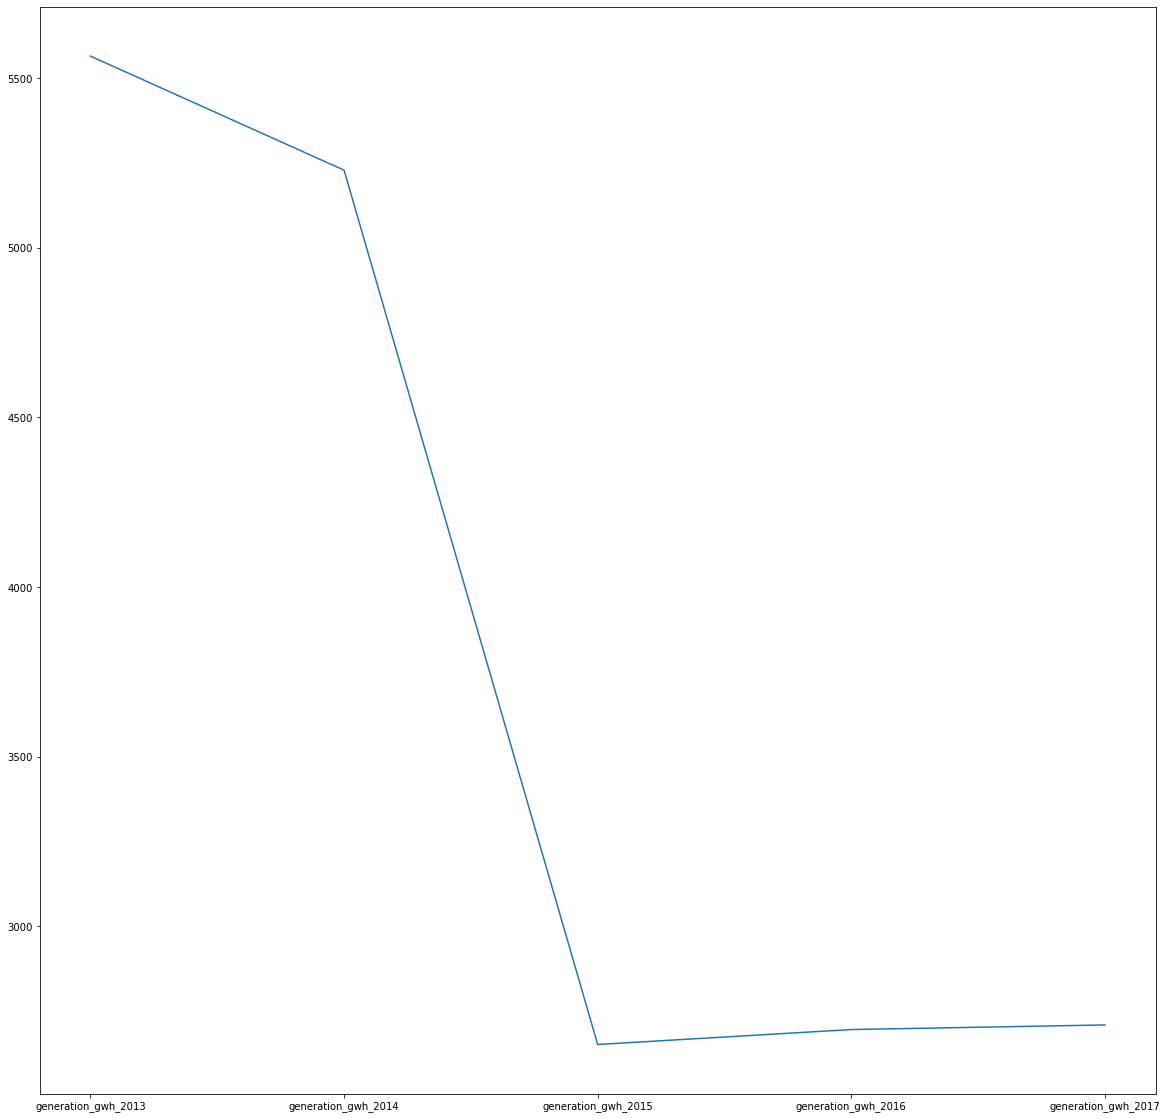

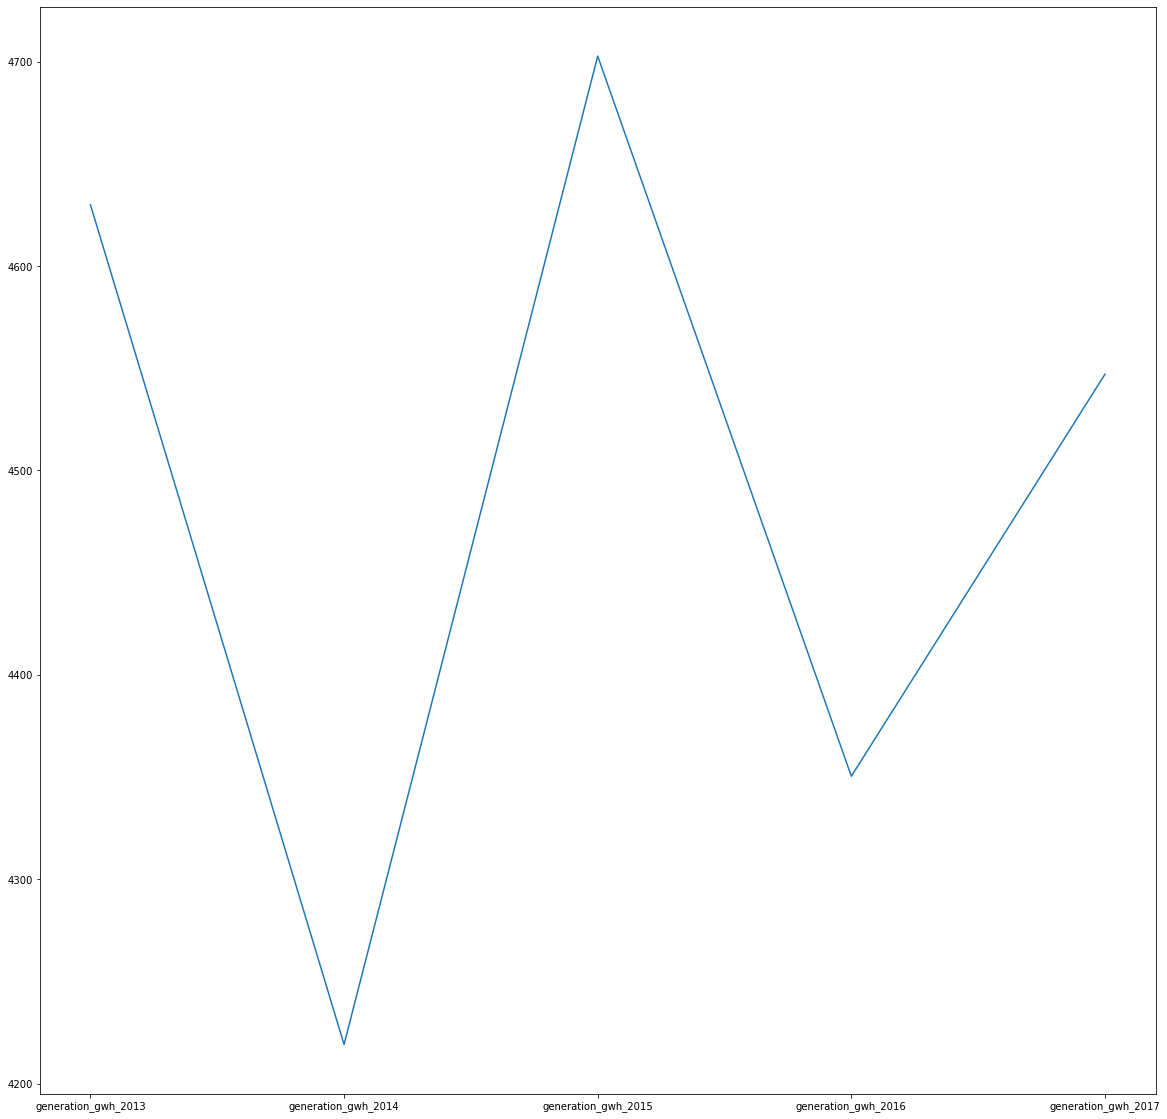

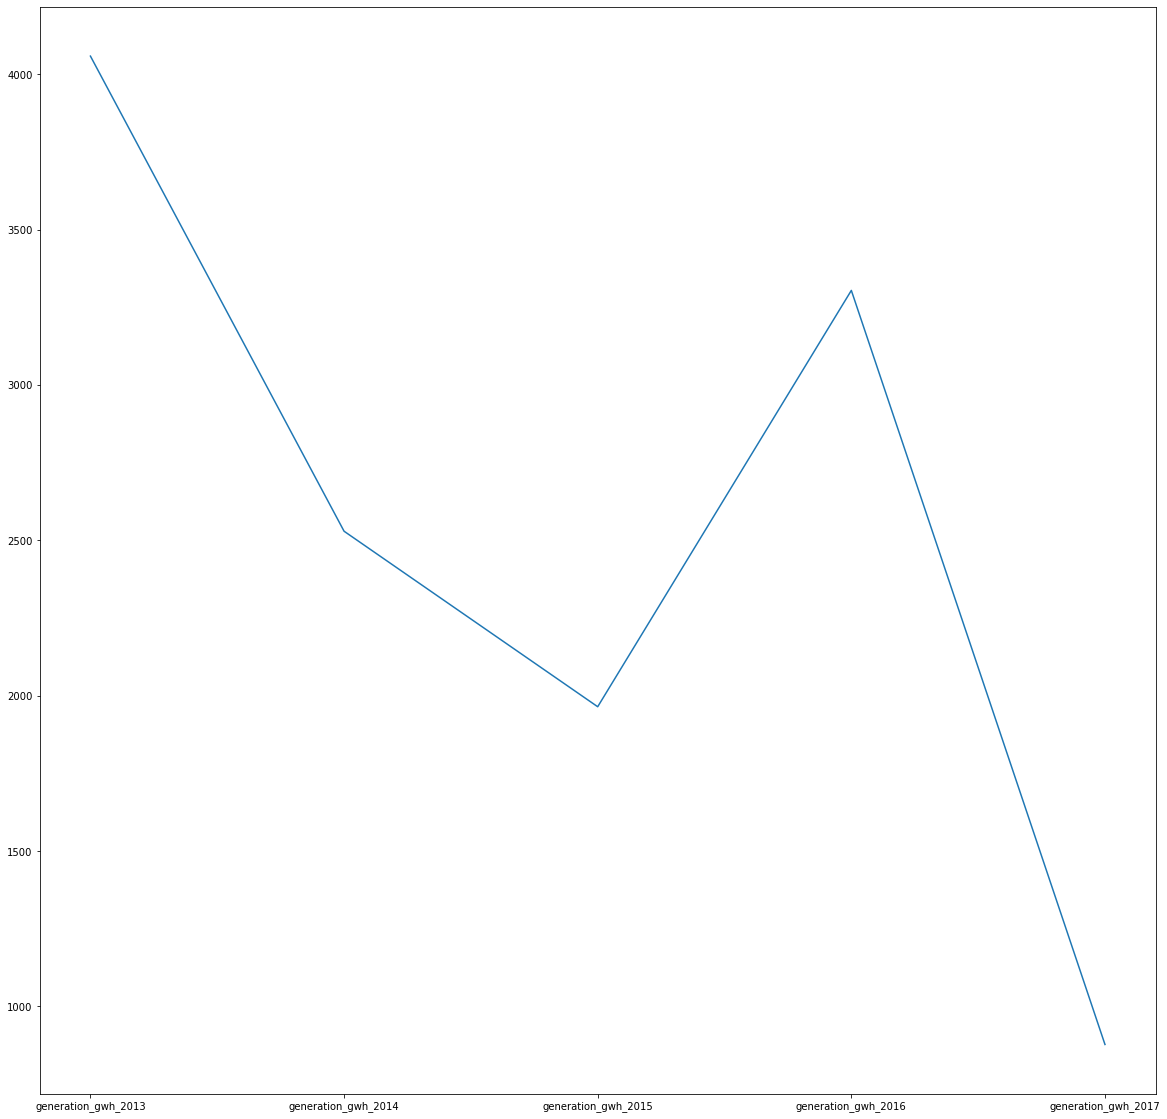

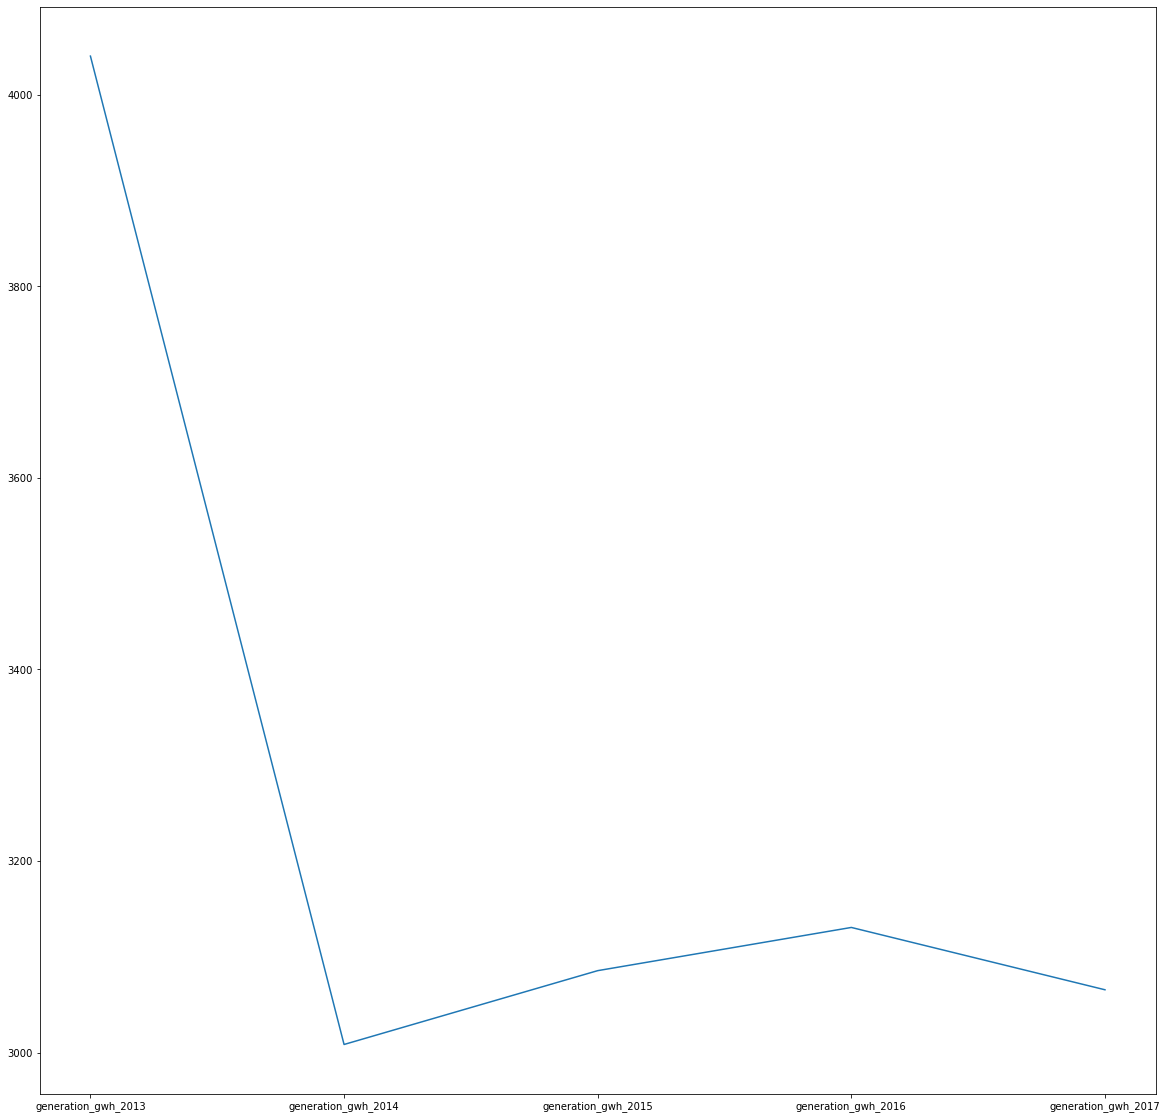

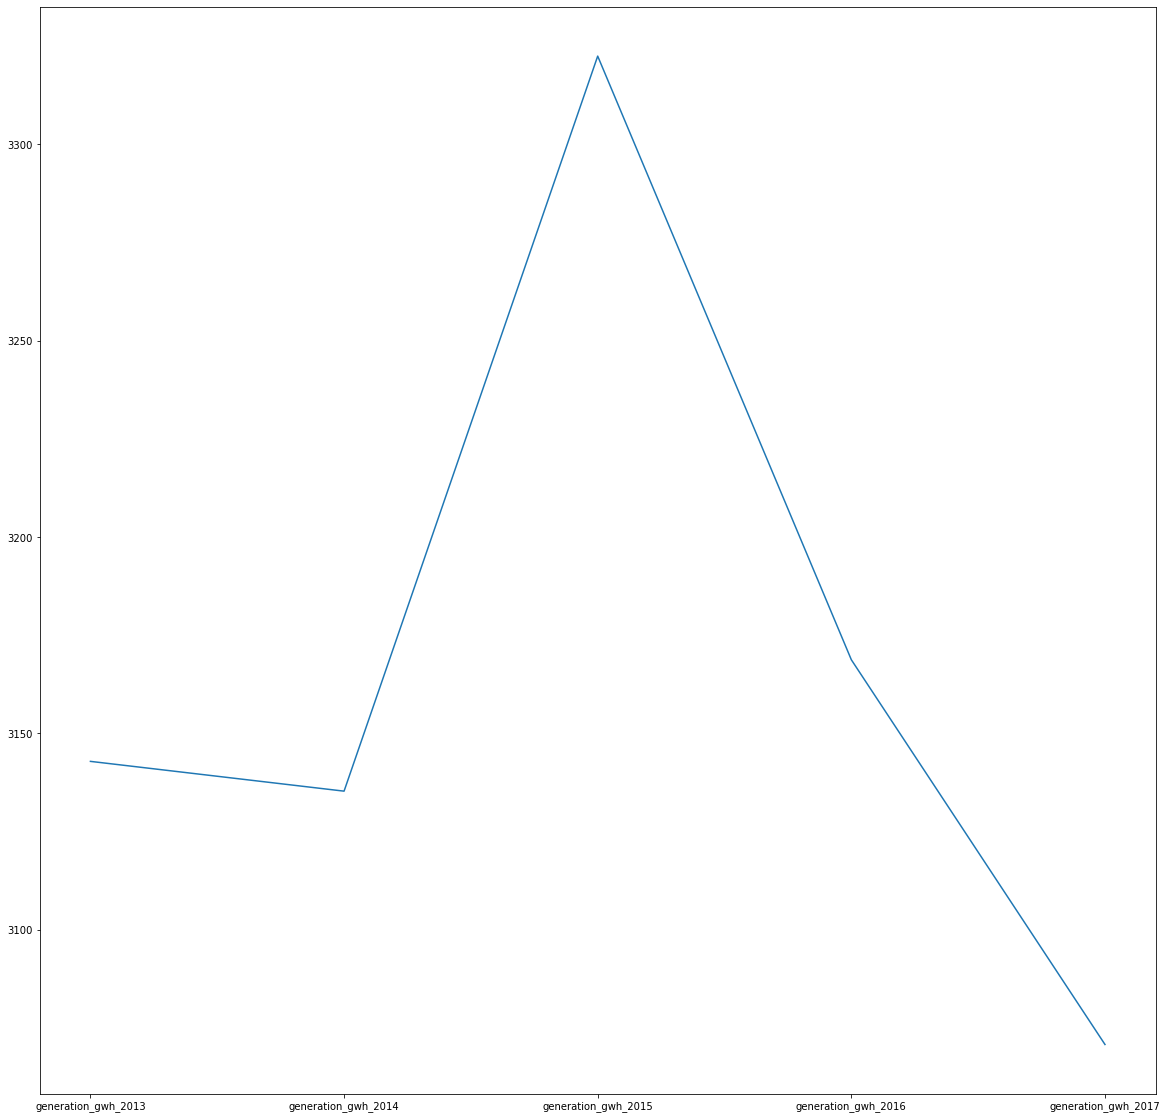

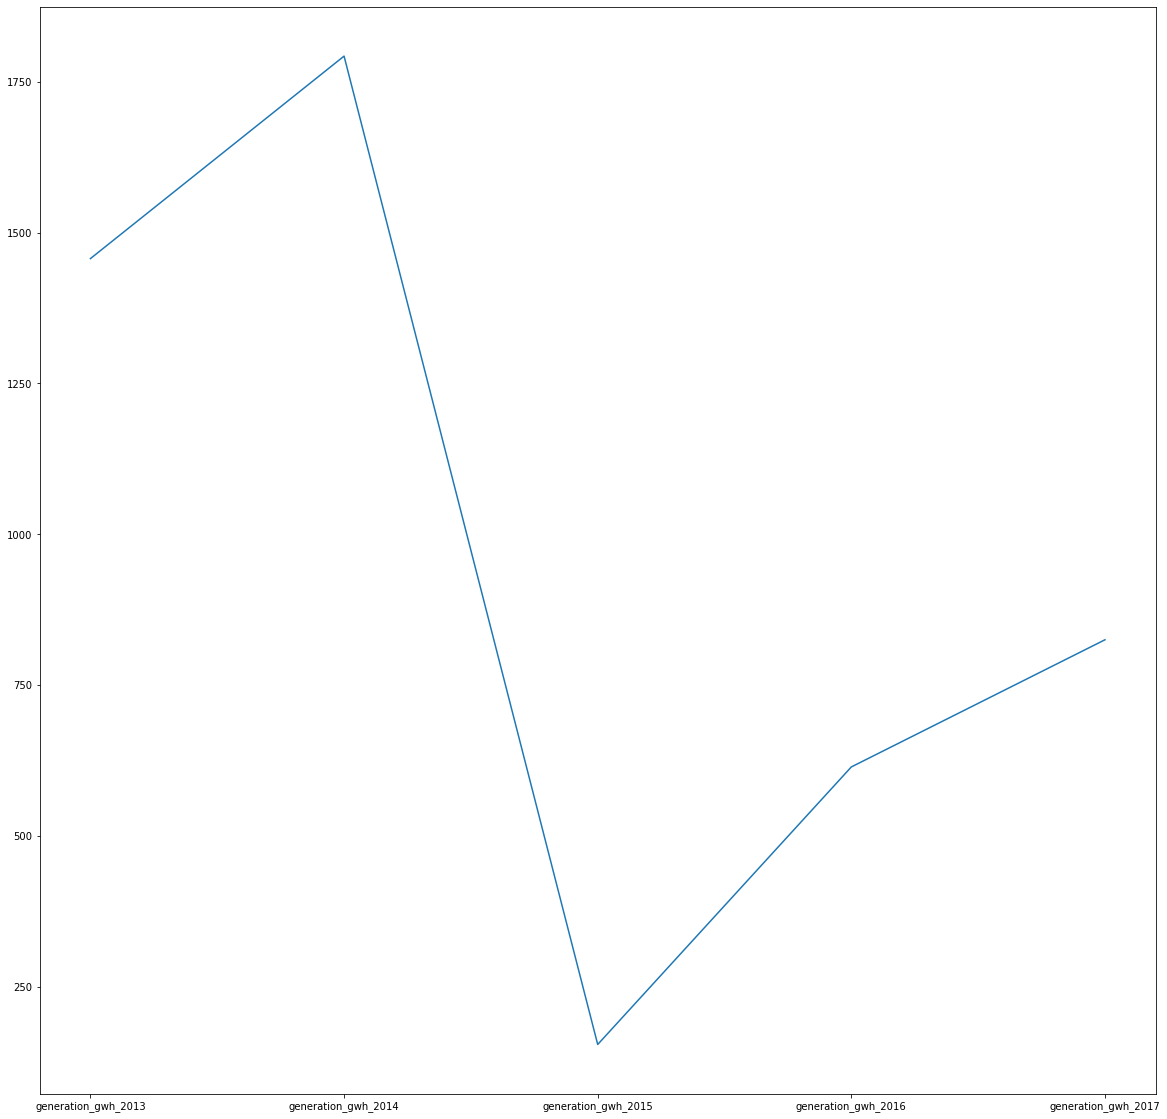

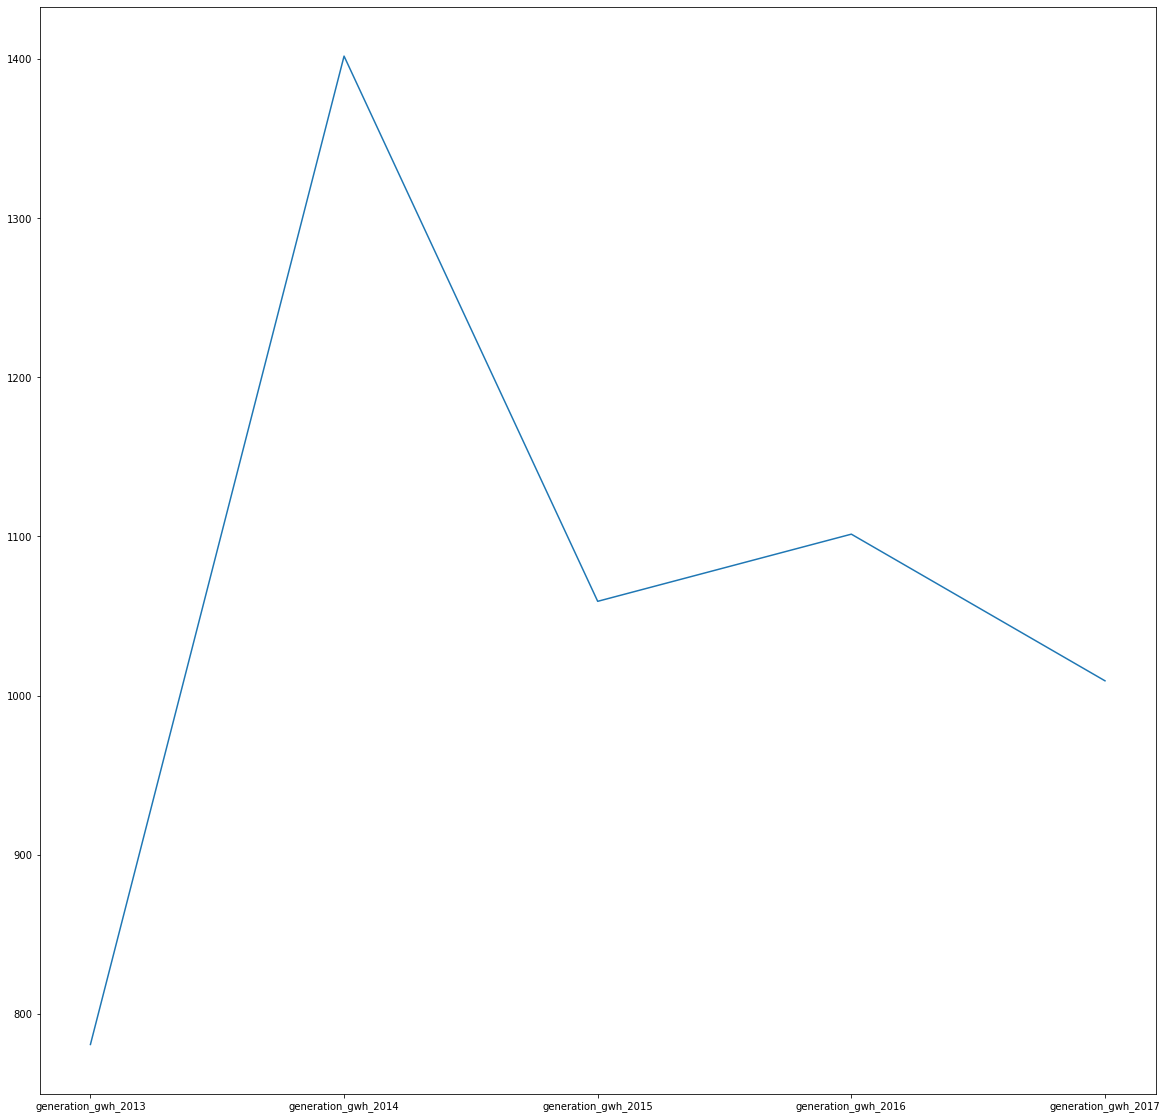

In [52]:
for q in range(hydro_power.shape[0]):
    print('This is for row',q)
    plt.figure(figsize=(20,20))
    plt.plot(hydro_power.iloc[q, :])
    if q == 10:
        break